## Figure 3 Plots

This notebook will generate the plots for Figure 3 in the paper. These experiments compare the PFS algorithm to the MVMD-3 baseline. We compare the l-diversity metrics from the respective padding scheme produced by algorithms.

In [1]:
import sys
import os 

sys.path.insert(0, '..')
os.chdir('..')
print(os.getcwd())

/Users/pranayjain/Desktop/Security Research/constrained-padding-sequences


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


%load_ext autoreload
%autoreload 2

In [3]:
from pfs import run_pfs
from mvmd import run_mvmd
from utils import elementWiseDiff

#### Set the dataset

Set the dataset variable below. You may uncomment any of the lines below to generate the plots for the corresponding dataset.

The datasets `autocomplete`, `wikipedia` and `linode_from_index` will generate plots for Figure 4. The dataset `synthetic2` will generate the plot for figure 5.

In [33]:
dataset, max_len, leg_x, leg_y, y_lim = 'autocomplete', 14, 12, 9, 17
# dataset, max_len, leg_x, leg_y, y_lim = 'linode_from_index', 7, 8, 5, 8
# dataset, max_len, leg_x, leg_y, y_lim = 'wikipedia', 7, 13, 5, 60

In [34]:
c=2
pfs_l_div_res = run_pfs(dataset, c)['l_div']
pfs_min_l_div, pfs_max_l_div, pfs_avg_l_div = pfs_l_div_res

mvmd_l_div_res = run_mvmd(dataset)['l_div']
mvmd_min_l_div, mvmd_max_l_div, mvmd_avg_l_div = mvmd_l_div_res

('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
Gurobi's optimization method runtime (in seconds): 34.11923813819885
i_inf for target sequence length 1 = 9.61027951144475e-16
i_inf for target sequence length 2 = 1.000000000000007
i_inf for target sequence length 3 = 1.584962500721162
i_inf for target sequence length 4 = 2.3923174227787634
i_inf for target sequence length 5 = 2.643856189774727
i_inf for target sequence length 6 = 3.044394119358457
i_inf for target sequence length 7 = 3.3575520046180864
i_inf for target sequence length 8 = 3.357552004618085
i_inf for target sequence length 9 = 2.000000000000004
i_inf for target sequence length 10 = 1.000000000000002
i_inf for target sequence length 11 = 1.000000000000002
i_inf for target sequence length 12 = 3.844111804577896e-15
i_inf for target sequence length 13 = 3.203426503814917e-16
i_inf for target sequence length 14 = -9.610279511444756e-16


In [35]:
c_vals = {"autocomplete": 31.73, "linode_from_index": 5707.33, "wikipedia": 43.07}

mp = {
    '\\ourAlg Min Diversity (\\padFactor=2.0)': pfs_min_l_div,
    '\\ourAlg Max Diversity (\\padFactor=2.0)': pfs_max_l_div,
    '\\ourAlg Avg Diversity (\\padFactor=2.0)': pfs_avg_l_div,
    f'\\lDivAlg{{3}} Min Diversity (\\padFactor={c_vals[dataset]})': mvmd_min_l_div,
    f'\\lDivAlg{{3}} Max Diversity (\\padFactor={c_vals[dataset]})': mvmd_max_l_div,
    f'\\lDivAlg{{3}} Avg Diversity (\\padFactor={c_vals[dataset]})': mvmd_avg_l_div,
}

In [36]:
ourAlg_stacked_mp, ldiv_stacked_mp = {}, {}

metric_name = ["Min", "Avg"]

for i in range(len(metric_name)):
    src = f'\\ourAlg {metric_name[i]} Diversity (\\padFactor=2.0)'
    if i == 0: 
        updated_res = mp[src]
    else:
        updated_res = elementWiseDiff(
            mp[f'\\ourAlg {metric_name[i-1]} Diversity (\\padFactor=2.0)'],
            mp[src],
        )
    ourAlg_stacked_mp[src] = updated_res
    
for i in range(len(metric_name)):
    src = f'\\lDivAlg{{3}} {metric_name[i]} Diversity (\\padFactor={c_vals[dataset]})'
    if i == 0: 
        updated_res = mp[src]
    else:
        updated_res = elementWiseDiff(
            mp[f'\\lDivAlg{{3}} {metric_name[i-1]} Diversity (\\padFactor={c_vals[dataset]})'],
            mp[src],
        )
    ldiv_stacked_mp[src] = updated_res

In [37]:
mp

{'\\ourAlg Min Diversity (\\padFactor=2.0)': [5.906485217313377,
  2.012550948966009,
  3.416886520335935,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.1590327868852461,
  1.7411167512690355,
  1.0,
  1.2326250892401838,
  1.0294409937888198,
  1.0],
 '\\ourAlg Max Diversity (\\padFactor=2.0)': [5.906485217313377,
  12.855115985539646,
  33.33715427029166,
  35.403623210689666,
  39.750138517423224,
  42.17284616885741,
  53.99291907190208,
  30.2643694798572,
  10.34353788373278,
  4.236139495155529,
  2.517150203977562,
  1.2326250892401838,
  1.0294409937888198,
  1.0],
 '\\ourAlg Avg Diversity (\\padFactor=2.0)': [5.906485217313377,
  7.4338334672528275,
  16.23812561034992,
  10.271201730714475,
  9.652046998486453,
  8.089123111392393,
  7.979247532621847,
  5.0482791965671785,
  3.690846890518495,
  2.988628123212282,
  1.758575101988781,
  1.2326250892401838,
  1.0294409937888198,
  1.0],
 '\\lDivAlg{3} Min Diversity (\\padFactor=31.73)': [3.0130945555006443,
  3.0002679053975645,
  

### Plots

In [38]:
colors = {}
colors["\\lDivAlg{3}"] = "grey" 
colors["\\ourAlg"] = "lightgrey" 

spaces = {}
spaces["\\lDivAlg{3}"] = .4 
spaces["\\ourAlg"] = .4     

sq = 1 # square dimension

In [39]:
def draw_null_sq(x_offset, y_offset):
    square = patches.Rectangle((leg_x+x_offset*sq,leg_y+y_offset*sq), sq, sq, linewidth=1, edgecolor='black', facecolor="white")
    ax.add_patch(square)
    x1, y1 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq], [leg_y+y_offset*sq, leg_y+y_offset*sq+sq]
    x2, y2 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq], [leg_y+y_offset*sq+sq, leg_y+y_offset*sq]
    plt.plot(x1, y1, x2, y2, color="gray", linewidth=0.5)
    
def draw_null_rec_big(x_offset, y_offset):
    square = patches.Rectangle((leg_x+x_offset*sq,leg_y+y_offset*sq), sq*2, sq*4, linewidth=1, edgecolor='black', facecolor="white")
    ax.add_patch(square)
    x1, y1 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq*2], [leg_y+y_offset*sq, leg_y+y_offset*sq+sq*4]
    x2, y2 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq*2], [leg_y+y_offset*sq+sq*4, leg_y+y_offset*sq]
    plt.plot(x1, y1, x2, y2, color="gray", linewidth=0.5)
    
def draw_null_rec_small(x_offset, y_offset):
    square = patches.Rectangle((leg_x+x_offset*sq,leg_y+y_offset*sq), sq*2, sq, linewidth=1, edgecolor='black', facecolor="white")
    ax.add_patch(square)
    x1, y1 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq*2], [leg_y+y_offset*sq, leg_y+y_offset*sq+sq]
    x2, y2 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq*2], [leg_y+y_offset*sq+sq, leg_y+y_offset*sq]
    plt.plot(x1, y1, x2, y2, color="gray", linewidth=0.5)

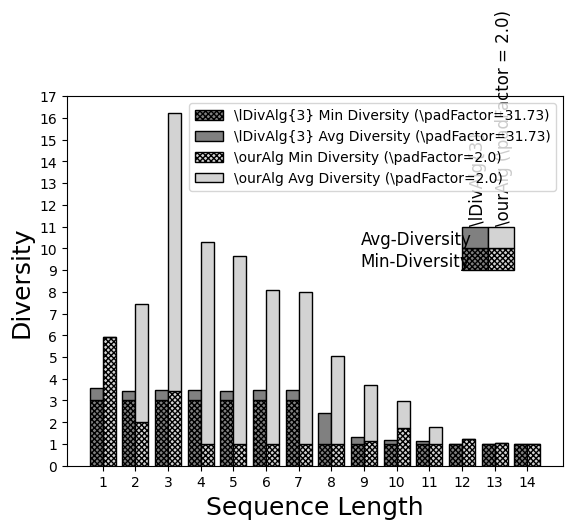

In [40]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()
#hatches = ['\\\\', '', '//', ''] # WORKS GOOD IF WE DON'T INCLUDE c=2.0
hatches = ['xxxxxx', '']
alphas = [1, 0.7, 0.4, 0.2]

# Plot data
def plot_stacked_bar(stacked_mp, x_offset = 0, edgecolor='black'):
    for i, (name, values) in enumerate(stacked_mp.items()):
        bottom = [0]*len(values) if i == 0 else [sum(x) for x in zip(*list(stacked_mp.values())[:i])]
        ax.bar(
            np.array(range(len(values))) + x_offset + 1, 
            values, 
            bottom=bottom, 
            width=spaces[name.split(" ")[0]],
            edgecolor=edgecolor,
            #color='white',
            color=colors[name.split(" ")[0]],
            hatch=hatches[i%len(hatches)],
            #alpha=alphas[i%len(alphas)],
            label=name,
            align='edge')

plot_stacked_bar(ldiv_stacked_mp, x_offset=-0.4, edgecolor='black')
plot_stacked_bar(ourAlg_stacked_mp, x_offset=0.0, edgecolor='black')
# Add legend
ax.legend()
plt.xticks(range(1,max_len+1))
ax.set_ylim(0,y_lim)

if dataset == "wikipedia":
    ax.set_yticks(np.arange(0,y_lim+1,4))
else:
    ax.set_yticks(np.arange(0,y_lim+1,1))

plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('Diversity', fontsize=18)

if dataset == "autocomplete":
    square = patches.Rectangle((leg_x,leg_y), .8*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\lDivAlg{3}"], hatch="xxxxxx")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x,leg_y+sq), .8*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\lDivAlg{3}"], hatch="")
    ax.add_patch(square)
    
    square = patches.Rectangle((leg_x+.8*sq,leg_y), .8*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="xxxxxx")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+.8*sq,leg_y+sq), .8*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="")
    ax.add_patch(square)

    ax.text(leg_x-3.1, leg_y+.2*sq, "Min-Diversity", fontsize="large")
    ax.text(leg_x-3.1, leg_y+1.2*sq, "Avg-Diversity", fontsize="large")

    ax.text(leg_x+.2*sq, leg_y+2.25*sq, "\\lDivAlg{3}", rotation='vertical', fontsize="large")
    ax.text(leg_x+sq, leg_y+2.25*sq, "\\ourAlg (\padFactor = 2.0)", rotation='vertical', fontsize="large")
    
#label_c = {"autocomplete": "\\lDivAlg{3} (\padFactor = 31.73)", 
#           "linode_from_index": "\\lDivAlg{3} (\padFactor = 5707.33)", 
#           "wikipedia": "\\lDivAlg{3} (\padFactor = 43.07)"}
    
#label_x = {"autocomplete": .5, 
#           "linode_from_index": .4, 
#           "wikipedia": .5}

#t = ax.text(label_x[dataset], .90, label_c[dataset], horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=18)
#t.set_bbox(dict(facecolor="white", alpha=1, edgecolor="black"))
    
# Show plot
plt.show()